# Joins and MultiIndexes

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
pop = pd.read_excel('data/gapminder_population.xlsx', index_col=0)
fert = pd.read_csv('data/gapminder_total_fertility.csv', index_col=0)
cont = pd.read_csv('data/continents.csv', sep=';')

In [26]:
pop.shape, fert.shape, cont.shape

((275, 81), (260, 216), (194, 2))

In [27]:
pop = (pop.dropna() / 1000_000).round(1)

In [19]:
fert = fert.dropna().round(1)

In [41]:
fert.columns = [int(c) for c in fert.columns]

In [24]:
pop.head(4)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
fert.head(4)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.5,6.2,5.9,5.7,5.4,5.1,4.9,4.7,4.5
Albania,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,1.8,1.8,1.8,1.7,1.7,1.8,1.8,1.8,1.8,1.8
Algeria,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,2.6,2.7,2.7,2.8,2.8,2.8,2.8,2.8,2.8,2.7
Angola,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,6.9,...,6.6,6.5,6.4,6.3,6.2,6.1,6.0,5.9,5.8,5.6


In [7]:
cont.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


## Bring the data together

In [43]:
# convert to long format
pop_long = pop.stack() # pd.Series with a 2-level MultiIndex
fert_long = fert.stack()

In [45]:
df = pd.DataFrame({'population': pop_long, 'fertility': fert_long})
df.head()

population  fertility
Afghanistan 1800         3.3        7.0
            1801         NaN        7.0
            1802         NaN        7.0
            1803         NaN        7.0
            1804         NaN        7.0

In [48]:
# MultiIndex with 3 levels
# long format: lots of rows, 1 column
# ==> Bad for plotting, good for changing the format
long = df.stack()
long.head()

Afghanistan  1800  population    3.3
                   fertility     7.0
             1801  fertility     7.0
             1802  fertility     7.0
             1803  fertility     7.0
dtype: float64

In [53]:
wide = long.unstack() # takes the last index level and makes columns out of it
wide.head()

population  fertility
Afghanistan 1800         3.3        7.0
            1801         NaN        7.0
            1802         NaN        7.0
            1803         NaN        7.0
            1804         NaN        7.0

<AxesSubplot:xlabel='population', ylabel='fertility'>

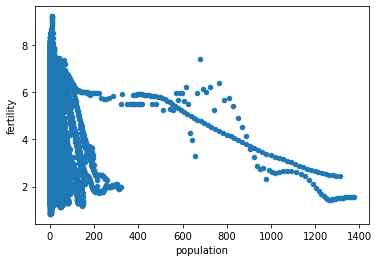

In [52]:
wide.plot.scatter(x='population', y='fertility')

In [62]:
wide = long.unstack(0)
wide.head()

Afghanistan  Albania  Algeria  American Samoa  Andorra  \
1800 population          3.3      0.4     2.50             0.0      0.0   
     fertility           7.0      4.6     6.99             NaN      NaN   
1801 fertility           7.0      4.6     6.99             NaN      NaN   
1802 fertility           7.0      4.6     6.99             NaN      NaN   
1803 fertility           7.0      4.6     6.99             NaN      NaN   

                 Angola  Anguilla  Antigua and Barbuda  Argentina  Armenia  \
1800 population    1.60       0.0                 0.00        0.5     0.40   
     fertility     6.93       NaN                 5.00        6.8     7.80   
1801 fertility     6.93       NaN                 5.00        6.8     7.80   
1802 fertility     6.93       NaN                 4.99        6.8     7.81   
1803 fertility     6.93       NaN                 4.99        6.8     7.81   

                 ...  Vanuatu  Venezuela  Vietnam  Virgin Islands (U.S.)  \
1800 population  ...      0.0       0.70      6.6                   0.00   
     fertility   ...      6.6       5.63      4.7                   5.55   
1801 fertility   ...      6.6       5.63      4.7                   5.55   
1802 fertility   ...      6.6       5.64      4.7                   5.55   
1803 fertility   ...      6.6       5.64      4.7                   5.55   

                 Wallis et Futuna  West Bank and Gaza  Western Sahara  Yemen  \
1800 population               0.0                0.20            0.00   2.60   
     fertility                NaN                6.97            6.32   6.88   
1801 fertility                NaN                6.97            6.32   6.88   
1802 fertility                NaN                6.97            6.32   6.88   
1803 fertility                NaN                6.97            6.32   6.88   

                 Zambia  Zimbabwe  
1800 population    0.70      1.10  
     fertility     6.71      6.75  
1801 fertility     6.71      6.75  
1802 fertility     6.71      6.75  
1803 fertility     6.71      6.75  

[5 rows x 231 columns]

## Questions

#### When to use [] or [[]] in a df.loc or df[]?

In [ ]:
# df[col] - single column
# df[[col1, col2]] - multiple columns
# df.loc[row1]
# df.loc[[row1, row2]]
# df.loc[row1, col1]  - single cell
# df.loc[[row1, row2], [col1, col2]]

In [72]:
# wide.loc[1800] # sub-selects first index level
# wide.loc[(1800, 'population')] # select both index levels
# wide.loc[[1800, 1810]]
# wide.loc[[(1800, 'population'), (1810, 'fertility')]]
# DOES NOT WORK wide.loc['population']
# wide.loc[(1800, 'population'), 'Albania']
wide.head()

Afghanistan  Albania  Algeria  American Samoa  Andorra  \
1800 population          3.3      0.4     2.50             0.0      0.0   
     fertility           7.0      4.6     6.99             NaN      NaN   
1801 fertility           7.0      4.6     6.99             NaN      NaN   
1802 fertility           7.0      4.6     6.99             NaN      NaN   
1803 fertility           7.0      4.6     6.99             NaN      NaN   

                 Angola  Anguilla  Antigua and Barbuda  Argentina  Armenia  \
1800 population    1.60       0.0                 0.00        0.5     0.40   
     fertility     6.93       NaN                 5.00        6.8     7.80   
1801 fertility     6.93       NaN                 5.00        6.8     7.80   
1802 fertility     6.93       NaN                 4.99        6.8     7.81   
1803 fertility     6.93       NaN                 4.99        6.8     7.81   

                 ...  Vanuatu  Venezuela  Vietnam  Virgin Islands (U.S.)  \
1800 population  ...      0.0       0.70      6.6                   0.00   
     fertility   ...      6.6       5.63      4.7                   5.55   
1801 fertility   ...      6.6       5.63      4.7                   5.55   
1802 fertility   ...      6.6       5.64      4.7                   5.55   
1803 fertility   ...      6.6       5.64      4.7                   5.55   

                 Wallis et Futuna  West Bank and Gaza  Western Sahara  Yemen  \
1800 population               0.0                0.20            0.00   2.60   
     fertility                NaN                6.97            6.32   6.88   
1801 fertility                NaN                6.97            6.32   6.88   
1802 fertility                NaN                6.97            6.32   6.88   
1803 fertility                NaN                6.97            6.32   6.88   

                 Zambia  Zimbabwe  
1800 population    0.70      1.10  
     fertility     6.71      6.75  
1801 fertility     6.71      6.75  
1802 fertility     6.71      6.75  
1803 fertility     6.71      6.75  

[5 rows x 231 columns]

In [80]:
populations = wide.unstack(0).loc['population'].unstack(0)
populations.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Venezuela,Vietnam,Virgin Islands (U.S.),Wallis et Futuna,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1800,3.3,0.4,2.5,0.0,0.0,1.6,0.0,0.0,0.5,0.4,...,0.0,0.7,6.6,0.0,0.0,0.2,0.0,2.6,0.7,1.1
1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### How to select suitable columns to plot?

* use stack(), unstack() and col/row selections
* x-axis comes from the row index
* y-axis comes from the columns
* limit the number of columns!
* make sure indexes are meaningful => labels

#### How to make the plotted image look better?

* start with pandas/seaborn one-liners
* browse the galleries (matplotlib / seaborn gallery)
* if it is difficult to do with matplotlib, stop trying
* check out: Plotly, Altair, Vega

#### How to look up specific methods in pandas?

* pandas homepage documentation
* Jupyter/editor autocomplete (Shift-TAB)
* StackOverflow
* https://devdocs.io

#### When to use [] and () brackets?

Square:

* lists
* pandas selection
* selection from dictionaries

Round:

* function calls
* tuples (selecting from a MultiIndex)
* grouping expressions (3+4)*5
* inheritance

#### how to do np.log and log transform plotting?

In [85]:
s = populations['Afghanistan'].dropna()

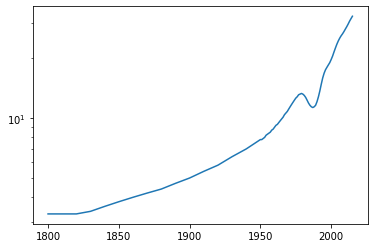

In [87]:
ax = s.plot()
ax.set_yscale('log')

#### how to use df.iterrows()?

#### i need some additional materials for learning from scratch